In [44]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [80]:
walmart_df = pd.read_csv('Walmart.csv')
#CPI – Prevailing consumer price index

In [81]:
walmart_df.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [82]:
walmart_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [83]:
walmart_df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

## To do
- cuantas tiendas hay
- grafico una tienda en especifico de sales/ tiempo
- holiday flag/ fecha
- [temperatura, precio_bencina, CPI, Unemployment]/ventas
- Gráfico de t/ Fuel_price, etc
- EDA
- Sacar R2 (correlacionados linealmente)
- Hacer regresion lineal

In [84]:
# Numero de tiendas

tiendas = walmart_df["Store"].drop_duplicates()
print(tiendas)

0        1
143      2
286      3
429      4
572      5
715      6
858      7
1001     8
1144     9
1287    10
1430    11
1573    12
1716    13
1859    14
2002    15
2145    16
2288    17
2431    18
2574    19
2717    20
2860    21
3003    22
3146    23
3289    24
3432    25
3575    26
3718    27
3861    28
4004    29
4147    30
4290    31
4433    32
4576    33
4719    34
4862    35
5005    36
5148    37
5291    38
5434    39
5577    40
5720    41
5863    42
6006    43
6149    44
6292    45
Name: Store, dtype: int64


In [85]:
# grafico una tienda en especifico de sales/ tiempo
# iloc acepta numeros, loc acepta nombres

venta_semanal = walmart_df.loc[walmart_df["Store"]==20,["Date","Weekly_Sales", "Holiday_Flag"]].reset_index()
venta_semanal.head()

,index,Date,Weekly_Sales,Holiday_Flag
0,2717,05-02-2010,2401395.47,0
1,2718,12-02-2010,2109107.90,1
2,2719,19-02-2010,2161549.76,0
3,2720,26-02-2010,1898193.95,0
4,2721,05-03-2010,2119213.72,0


In [56]:
# Transformar columna Date a formato datetime
venta_semanal["Date"] = pd.to_datetime(venta_semanal["Date"])
venta_semanal.dtypes

index                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
dtype: object

In [86]:
# Ordenar el df por fecha
venta_semanal.sort_values(by="Date", inplace=True)

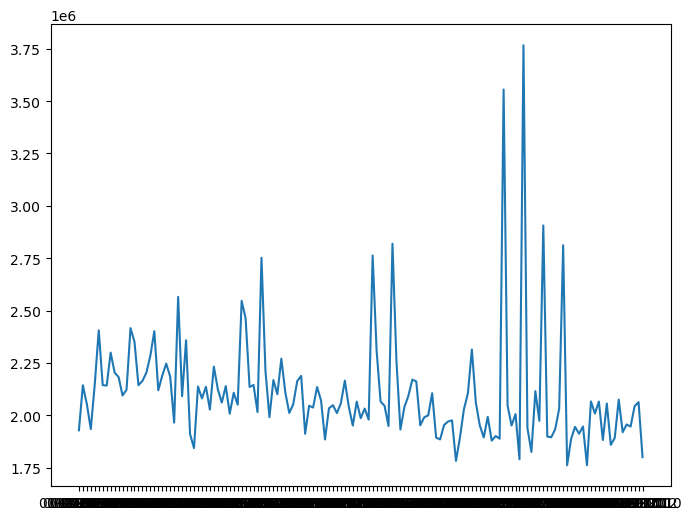

In [87]:
#Graficar 
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(venta_semanal["Date"], venta_semanal["Weekly_Sales"])

In [68]:
#venta_semanal.set_index("Date", inplace=True)
# del venta_semanal["index"]
venta_semanal.head()


,Weekly_Sales,Holiday_Flag
Date,,
2010-01-10,1933719.21,0
2010-02-04,2405395.22,0
2010-02-07,2143676.77,0
2010-02-19,2161549.76,0
2010-02-26,1898193.95,0


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor 

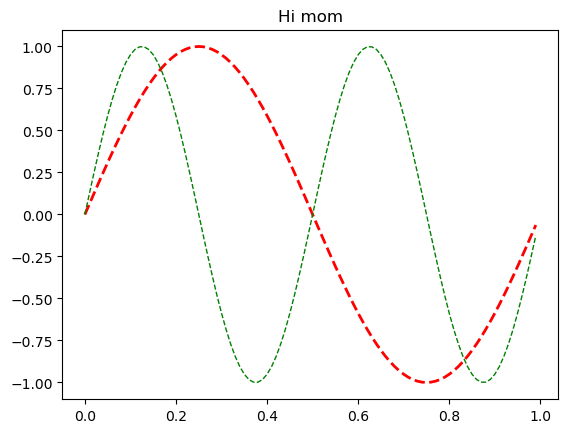

In [77]:
x = np.arange(0, 1.0, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = np.sin(4*np.pi*x)
lines = plt.plot(x, y1, x, y2)
l1, l2 = lines
plt.setp(lines, linestyle='--')       # set both to dashed
plt.setp(l1, linewidth=2, color='r')  # line1 is thick and red
plt.setp(l2, linewidth=1, color='g')  # line2 is thinner and green


#print('Line setters')
plt.setp(l1)
#print('Line getters')
plt.getp(l1)

#print('Rectangle setters')
plt.setp(plt.gca().patch)
#print('Rectangle getters')
plt.getp(plt.gca().patch)

t = plt.title('Hi mom')
#print('Text setters')
plt.setp(t)
#print('Text getters')
plt.getp(t)

plt.show()

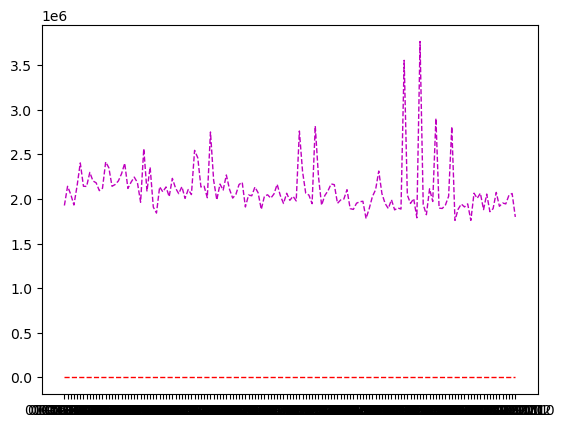

In [92]:
x = venta_semanal["Date"]
y1 = venta_semanal["Weekly_Sales"]
y2 = venta_semanal["Holiday_Flag"]
lines = plt.plot(x, y1, x, y2)
l1, l2 = lines
plt.setp(lines, linestyle='--')       # set both to dashed
plt.setp(l1, linewidth=1, color='m')  # line1 is thick and red
plt.setp(l2, linewidth=1, color='r')  # line2 is thinner and green

plt.show()

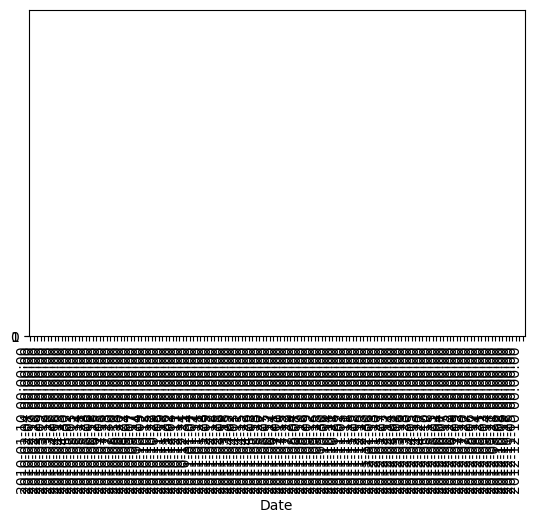

In [73]:
p1 = venta_semanal["Weekly_Sales"].plot(kind='line', yticks=[10, 40, 80])
p2 = venta_semanal["Holiday_Flag"].plot(kind="bar", yticks=[0, 1])

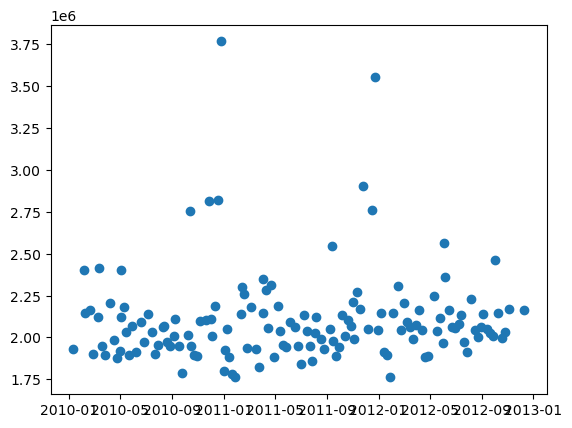

In [50]:
# Graficar :D LO QUE NO HAY QUE HACER! para series de tiempo

plt.scatter(venta_semanal["Date"], venta_semanal["Weekly_Sales"])
plt.show()